# Tutorial 10: Boundary Value Problems for ODE



In this notebook, we will study the numerical solution of 
$$

y'' = -n^2 \pi^2 y  
$$

with boundary conditions $ y(0) = 0 $ and $ y(1) = 0 $. 

Below is a Python script to demonstrate the shooting method to solve a simple boundary value problem. The script uses `scipy.integrate.solve_ivp` for numerical integration and `matplotlib` for visualization.




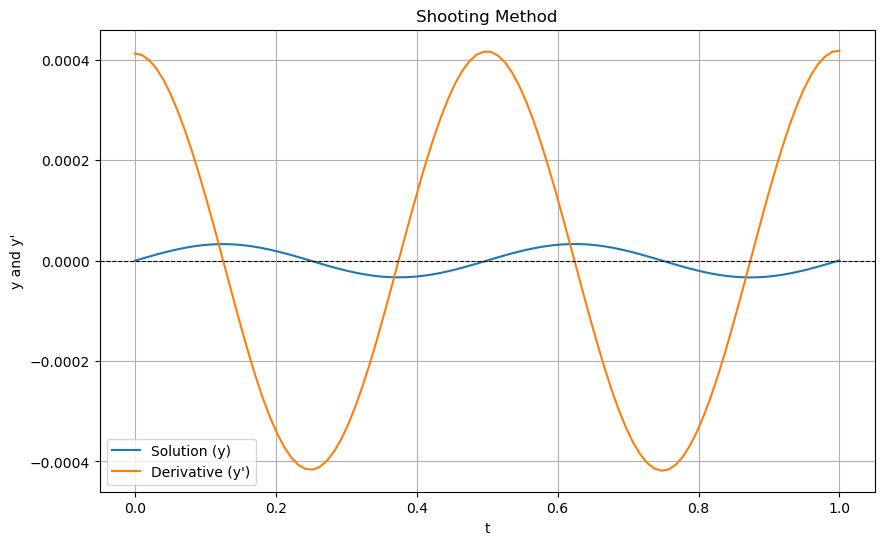

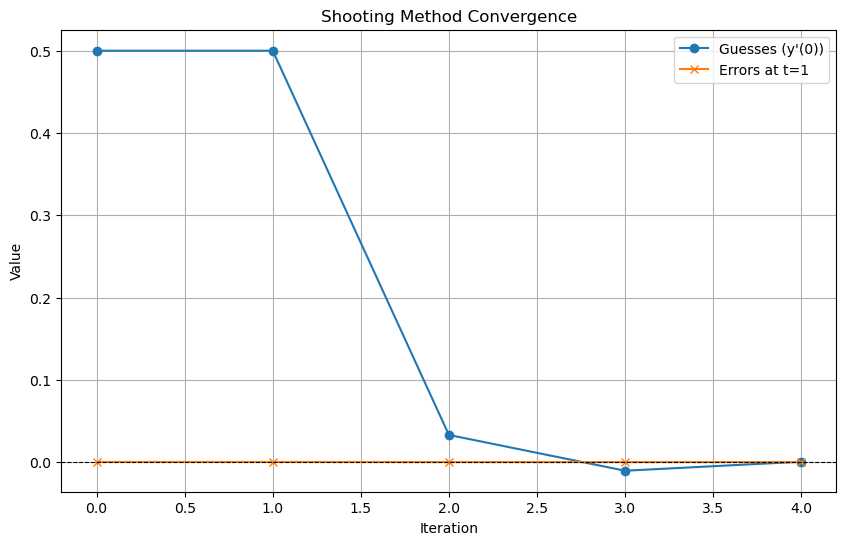

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Define the differential equation y'' = -n^2 \pi^2 y as a first-order system
def ODE(t, y):
    n=4
    return [y[1], -n*n*np.pi*np.pi*y[0]]


# Function to compute the shooting method
def shooting_method(f, t_span, y0_guess, target, boundary, max_iter=10, tol=1e-6):
    guesses = [y0_guess]
    errors = []

    for _ in range(max_iter):
        sol = solve_ivp(
            f, t_span, [boundary[0], guesses[-1]], t_eval=np.linspace(*t_span, 100)
        )
        error = sol.y[0, -1] - boundary[1]
        errors.append(error)

        if abs(error) < tol:
            return sol, guesses, errors

        # Adjust the initial slope (guess) using a simple secant method approach
        if len(guesses) > 1:
            delta = (guesses[-1] - guesses[-2]) / (errors[-1] - errors[-2])
            new_guess = guesses[-1] - error * delta
        else:
            new_guess = guesses[-1] - 0.1 * error  # Initial adjustment

        guesses.append(new_guess)

    raise RuntimeError("Shooting method did not converge.")


# Define the problem
t_span = (0, 1.)
boundary_conditions = (0, 0)  # y(0) = 0, y(π) = 0
initial_slope_guess = 0.5  # Initial guess for y'(0)

# Apply the shooting method
try:
    solution, guesses, errors = shooting_method(
        ODE, t_span, initial_slope_guess, 0, boundary_conditions
    )
except RuntimeError as e:
    print(e)
    solution = None

# Plot the results
if solution:
    plt.figure(figsize=(10, 6))
    plt.plot(solution.t, solution.y[0], label="Solution (y)")
    plt.plot(solution.t, solution.y[1], label="Derivative (y')")
    plt.title("Shooting Method")
    plt.xlabel("t")
    plt.ylabel("y and y'")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot guesses and errors
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(guesses)), guesses, marker="o", label="Guesses (y'(0))")
    plt.plot(range(len(errors)), errors, marker="x", label="Errors at t=1")
    plt.title("Shooting Method Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.legend()
    plt.grid()
    plt.show()

## TODO
1. Change $n$ in the ODE function to see how the solution changes. 
2. Change the initial guess for the slope and see how the solution changes.
3. Change the magnitude of `tol` and see how the convergence changes.